In [7]:
import pandas as pd
import seaborn as sns

# Explore the processed similarity data
### Load Data

In [5]:
df = pd.read_csv('data/sim.csv', index_col=0)
df.head()

,docstring,code,stars,repo,sim
0,Sets the {@link Converter} used for converting...,public final void setAuthorizationServerMetada...,2210,chegekinuthia/spring-authorization-server,0.912524
1,Create a ClassName object via its internal typ...,private ClassName(String type) {\n this...,1056,timfel/netbeans,0.703959
2,"Returns the type string of this class, as stor...",public String getType() {\n return type...,1056,timfel/netbeans,0.569791
3,"Returns the ""internal"" classname, as defined b...",public String getInternalName() {\n ret...,1056,timfel/netbeans,0.451056
4,"Returns the ""external"" classname, as defined b...",public String getExternalName() {\n ret...,1056,timfel/netbeans,0.412945


## Visualisations
Scatter plot of cosine similarity to repo max stars

<Axes: xlabel='stars', ylabel='sim'>

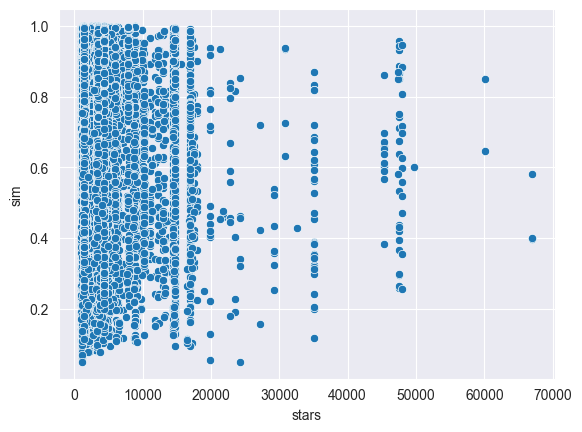

In [26]:
sns.scatterplot(df[df.stars < 80000], x='stars', y='sim')

Scatter plot of mean cosine similarity by repo

In [38]:
df_repo = df[['repo', 'stars', 'sim']].groupby('repo').mean()
df_repo.head()

,stars,sim
repo,,
10088/moquette,1191.0,0.301114
10088/struts,1330.0,0.519167
1060680253/AndroidChromium,3282.0,0.545864
111andre111/logstash,10340.0,0.549588
1st/jenkins,17275.0,0.600536


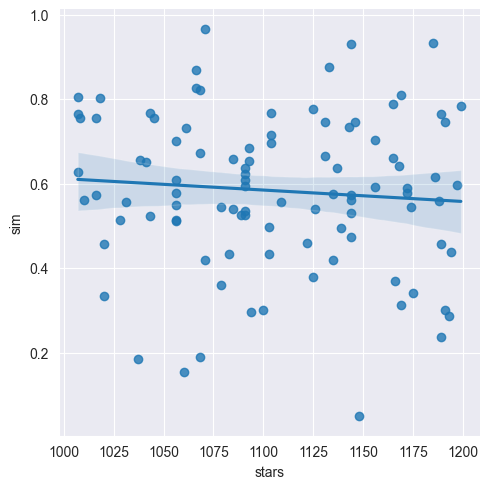

In [46]:
sns.lmplot(df_repo[df_repo.stars < 1200], x='stars', y='sim')

### Example Docstring/Code Pairs

In [54]:
df_sorted = df.sort_values('sim')
df_sorted.head()

,docstring,code,stars,repo,sim
20074,public class nth_term_of_ap {\n private sta...,},1148,Nikhil-Sharma-1/DS-Algo-Point,0.048954
6453,string,private final String string;\n\n public Csv...,24206,chenxian01/easyexcel,0.049662
782,/ package,final class SessionDescriptionParser {\n // S...,19920,goranch/ExoPlayer,0.055496
4431,default constructor,public WindowTable () {\n super(16);\n ...,1056,timfel/netbeans,0.059627
3030,Main method,public static void main(String[] args) {\n\t\t...,1100,WelsonAA/Intro-to-Java-Programming,0.067566


Worst

In [56]:
print("===== DOCSTRING ======")
print(df_sorted.iloc[0].docstring)
print("===== CODE =====")
print(df_sorted.iloc[0].code)
print(f"==== COSINE SIM: {df_sorted.iloc[0].sim}====")

===== DOCSTRING ======
public class nth_term_of_ap {
    private static Scanner scanner=new Scanner(System.in);
    public static void main(String[] args) {
        System.out.println("Enter the first term of A.P.");
        int t1 = scanner.nextInt();
        scanner.nextInt();

        System.out.println("Enter the second term of A.P.");
        int t2 = scanner.nextInt();
        scanner.nextInt();

        System.out.println("Write the position of the term you want to find out ");
        int n = scanner.nextInt();
        scanner.nextLine();

        System.out.println("The "+n+"th term of the A.P. equals");
        System.out.println(t1+((n-1)(t2-t1)));
        
        / sample input 
         Let the first term be 2 and second term be 5. Also let the value of n be 5
         The programs calculates the nth term by using formula of ap i.e. a+ (n-1)d
         Output is 14. 
         This code is contributed by <NAME>
         Time Complexity is O(1) and space complexity is O(1)
=

Best

In [58]:
print("===== DOCSTRING ======")
print(df_sorted.iloc[-1].docstring)
print("===== CODE =====")
print(df_sorted.iloc[-1].code)
print(f"==== COSINE SIM: {df_sorted.iloc[-1].sim}====")

===== DOCSTRING ======
Returns the ServerContext.
===== CODE =====
ServerContext getContext();
==== COSINE SIM: 0.9998469352722168====
